In [1]:
# Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

1. Convolution Function

In [2]:
def convolve2D(image, kernel):
   
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    output = np.zeros_like(image)

    # Zero padding
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    print(padded_image)
    # Performing 2D convolution
    for i in range(image_height):
        for j in range(image_width):
           
            roi = padded_image[i:i+kernel_height, j:j+kernel_width]
            output[i, j] = np.sum(roi * kernel)
            
    return output

In [3]:
# Image
image = np.array([[2, 5, 3, 4],
                  [9, 20, 8, 8],
                  [11, 10, 11, 12],
                  [13, 14, 10, 9]])

# Kernel
kernel = np.array([[1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9]])


result = convolve2D(image, kernel)

print("Original Image:")
print(image)

print("\nConvolved Image:")
print(result)

[[ 0  0  0  0  0  0]
 [ 0  2  5  3  4  0]
 [ 0  9 20  8  8  0]
 [ 0 11 10 11 12  0]
 [ 0 13 14 10  9  0]
 [ 0  0  0  0  0  0]]
Original Image:
[[ 2  5  3  4]
 [ 9 20  8  8]
 [11 10 11 12]
 [13 14 10  9]]

Convolved Image:
[[ 4  5  5  2]
 [ 6  8  9  5]
 [ 8 11 11  6]
 [ 5  7  7  4]]


2. Creating Custom Filters

In [4]:
# Import an image
img = cv2.imread(r'images\blue.jpg', 1) 

In [9]:
kernal = np.ones((5, 5), np.float32)/25

kernal2 = np.ones((9, 9), np.float32)/81

kernal3 = np.array([[1, 1, 1],
                     [1, 1, 1],
                     [1, 1, 1]])

kernal4 = np.array([[-1/9, -1/9, -1/9], 
                     [-1/9,  8/9, -1/9],
                     [-1/9, -1/9, -1/9]])

avg_5x5_kernal = np.array([[0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04]], dtype = np.float32)

In [10]:
# resImg = cv2.filter2D(src, depth, kernal)
resImg1 = cv2.filter2D(img, -1, kernal)
resImg2 = cv2.filter2D(img, -1, kernal2)
resImg3 = cv2.filter2D(img, -1, kernal3)

In [ ]:
# Plot

titles = ['Original Image', 'Image with Kernal', 'Image with Kernal2', 'Image with Kernal3']
images = [img, resImg1, resImg2, resImg3]

plt.figure(figsize=(10, 10), num='test.img')

for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.title(titles[i], fontsize = 10)
    plt.xticks([]), plt.yticks([])
    plt.imshow(images[i], 'gray')

NameError: name 'resImg1' is not defined

3. Low Pass Filters (Image Smoothing / De-noising)

Image Blurring (Image Smoothing)

###### Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noise (de-noising). 
###### This removes high frequency content (e.g: noise, edges) from the image resulting in edges being blurred when this is filter is applied.

i. Averaging

###### averaging means 1/size of the image.

In [ ]:
img = cv2.imread(r'Images/test_pattern_blurring_orig.tif', 0)

# blur = cv2.blur(image, kernal_size)                   # A 3x3 normalized box filter (K) would look like this : K = 1/9[[1,1,1],[1,1,1],[1,1,1]]
blurAv1 = cv2.blur(img, (5,5))                          
                                                        
# blur = cv2.blur(image, depth, kernal_size)
blurAv2 = cv2.boxFilter(img, -1, (5,5))

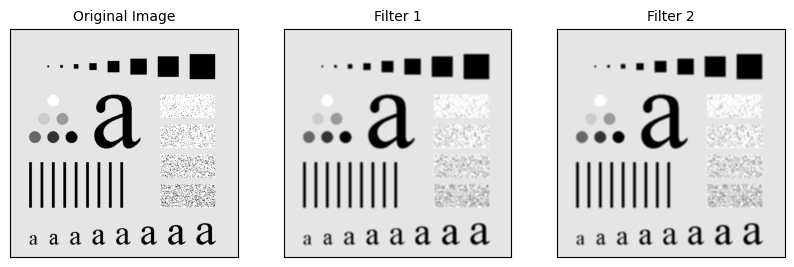

In [ ]:
# Plot

titles = ['Original Image', 'Filter 1', 'Filter 2']
images = [img, blurAv1, blurAv2]

plt.figure(figsize=(10, 10), num='test.img')

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(titles[i], fontsize = 10)
    plt.xticks([]), plt.yticks([])
    plt.imshow(images[i], 'gray')

ii. Gaussian Filtering

In [ ]:
# cv2.GaussianBlur(image, kernal_size, sd)
blurGaus = cv2.GaussianBlur(img, (5,5), 0)

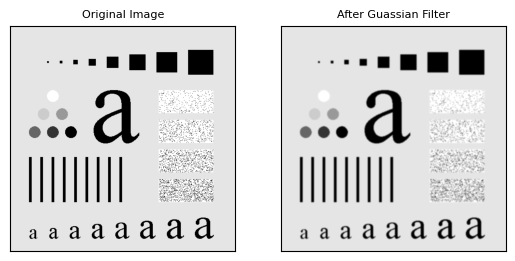

In [ ]:
# original image
plt.subplot(121)
plt.title('Original Image', fontsize = 8)
plt.xticks([]), plt.yticks([])
plt.imshow(img, 'gray')

# Output image
plt.subplot(122)
plt.title('After Guassian Filter', fontsize = 8)
plt.xticks([]), plt.yticks([])
plt.imshow(blurGaus, 'gray')

iii. Median Filtering

In [ ]:
# cv2.medianBlur(image, kernal_size)
blurMed = cv2.medianBlur(img, 5)      # 5 -> (5,5)

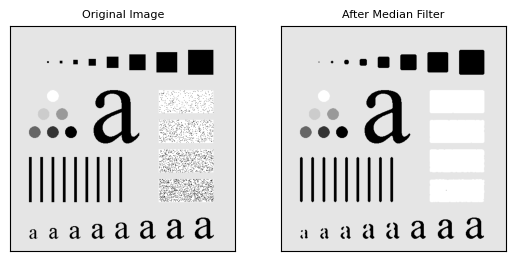

In [ ]:
# original image
plt.subplot(121)
plt.title('Original Image', fontsize = 8)
plt.xticks([]), plt.yticks([])
plt.imshow(img, 'gray')

# Output image
plt.subplot(122)
plt.title('After Median Filter', fontsize = 8)
plt.xticks([]), plt.yticks([])
plt.imshow(blurMed, 'gray')

###### bileteral filtering -> preserve the edges
###### gaussian function for edge blurring
######      difference of intensities
######      Proximity of center

###### we use both above function to make a new guassian function for get the Bileteral filter coefficients.

Q. study the effects of sigmaColor, sigmaSpace parameters o the cv2.bilateralFilter() on the output image.

In [ ]:
image = cv2.imread(r'Images/img_mri_brain_tumor.jpg', 0)

# blurBile = cv2.bilateralFilter(image, neighborhood, sigmaColor, sigmaSpace)
blurBile = cv2.bilateralFilter(image, 9, 75, 75)

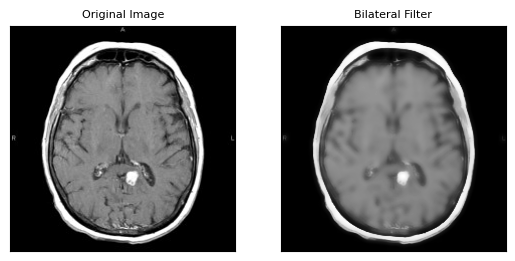

In [ ]:
# original image
plt.subplot(121)
plt.title('Original Image', fontsize = 8)
plt.xticks([]), plt.yticks([])
plt.imshow(image, 'gray')

# Filter
plt.subplot(122)
plt.title('Bilateral Filter', fontsize = 8)
plt.xticks([]), plt.yticks([])
plt.imshow(blurBile, 'gray')

4. High Pass Filters (Image Gradients & Sharpening)

######  A high pass filter tends to retain the high frequency information within an image while reducing the low frequency information. 
###### The kernel of the high pass filter is designed to increase the brightness of the center pixel relative to neighboring pixels

###### An image gradient is a directional change in the intensity or color in an image. 
###### The gradient of the image is one of the fundamental building blocks in image processing. 
###### For example, the Canny edge detector uses image gradient for edge detection.

i. Sobel Filter

In [ ]:
img = cv2. imread(r'images/sudoku-original.jpg', 0)

# cv2.Sobel(images, cv2_dtype, xAxis, yAxis, ksize = 3)
# vertical -> xAxis = 1

grad_x = cv2.Sobel(img, cv2.CV_8U, 1, 0, ksize=3)
grad_x2 = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=3)
grad_x3 = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)

# horizontal -> yAxis = 1
grad_y = cv2.Sobel(img, cv2.CV_8U, 0, 1, ksize=3)
grad_y2 = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=3)
grad_y3 = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# both axes
grad_xy = cv2.Sobel(img, cv2.CV_8U, 1, 1, ksize=3)

# vertical + horizontal
grad_xy_ = grad_x + grad_y

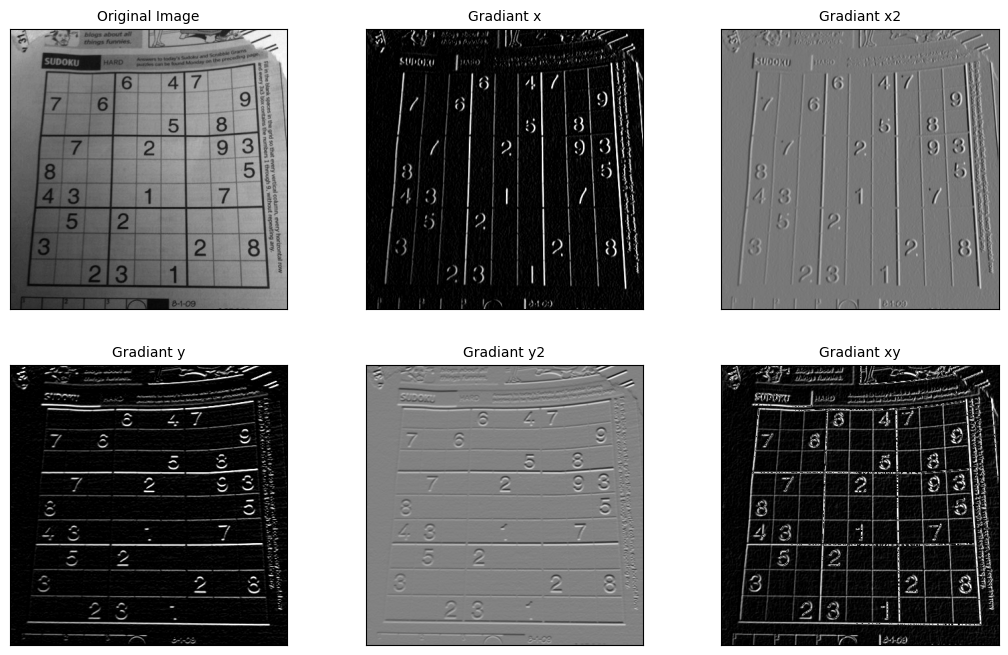

In [ ]:
# Plot

titles = ['Original Image', 'Gradiant x', 'Gradiant x2', 'Gradiant y', 'Gradiant y2', 'Gradiant xy']
images = [img, grad_x, grad_x2, grad_y, grad_y2, grad_xy_]

plt.figure(figsize=(13, 8), num='test.img')

for i in range(6):
    if i<3:
        plt.subplot(2, 3, i+1)
        plt.title(titles[i], fontsize = 10)
        plt.xticks([]), plt.yticks([])
        plt.imshow(images[i], 'gray')
    else:
        plt.subplot(2, 3, i+1)
        plt.title(titles[i], fontsize = 10)
        plt.xticks([]), plt.yticks([])
        plt.imshow(images[i], 'gray')

######  In the previous lecture note (L07), Sobel output data type was cv2.CV_8U or  np.uint8.  But  there  is  a  slight  problem  with  that.  Black-to-White transition is taken as Positive slope (it has a positive value) while White-to-Black transition is taken as a Negative slope (It has negative value). So when you convert data to np.uint8, all negative slopes are made zero. In simple words, you miss that edge.If you want to detect both edges, better option is to keep the output data type  to  some  higher  forms,  like  cv2.CV_16S,  cv2.CV_64F  etc,  take  its absolute value and then convert back to cv2.CV_8U.

In [11]:
img = cv2.imread(r'images/sudoku-original.jpg', 0)

# output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img, cv2.CV_8U, 1, 0, ksize=3)

# output dtype = cv2.CV_64F. Then take it absolute and convert into cv2.CV_8U
sobelx64f = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
absSobel64f = cv2.convertScaleAbs(sobelx64f)
sobel8U = np.uint8(absSobel64f)

ii. Laplacian Filter

In [ ]:
# watch out the signed and unsigned

    # black -> white -> +
    # white -> black -> - -----> use signed

In [ ]:
img = cv2.imread(r'Images/sudoku-original.jpg', 0)

# cv2.Laplacian(src_gray, cv2_dtype, ksize=kernal_size)

laplacian1 = cv2.Laplacian(img, cv2.CV_8U, ksize=3) 
laplacian2 = cv2.Laplacian(img, cv2.CV_16U, ksize=3)

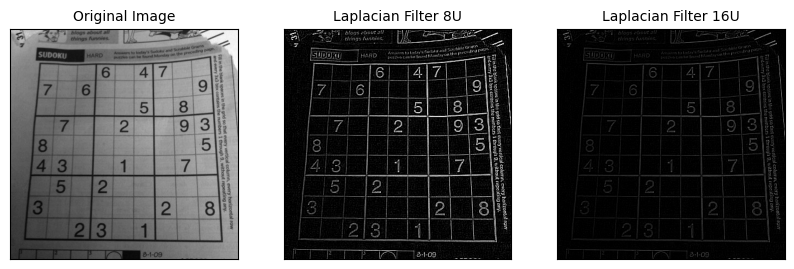

In [ ]:
# Plot

titles = ['Original Image', 'Laplacian Filter 8U', 'Laplacian Filter 16U']
images = [img, laplacian1, laplacian2]

plt.figure(figsize=(13, 10), num='test.img')

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(titles[i], fontsize = 10)
    plt.xticks([]), plt.yticks([])
    plt.imshow(images[i], 'gray')

5. Unsharp masking

###### Steps
###### 1. Blur the original image. We know by smoothing an image we suppress most of the high-frequency components.
###### 2. Subtract thissmoothed image from theoriginal image (theresulting difference is known as a mask).
###### 3. Add this mask back to the original image[ use addWeighted() ]

In [ ]:
img = cv2.imread(r'Images/blurry_moon.tif', 0)

In [ ]:
# method 01
# Blur the image - GaussianBlur
guass1 = cv2.GaussianBlur(img, (11,11), 0)

# Apply unsharp masking
sharpned_img1 = cv2.addWeighted(img, 2, guass1, -1, 0)

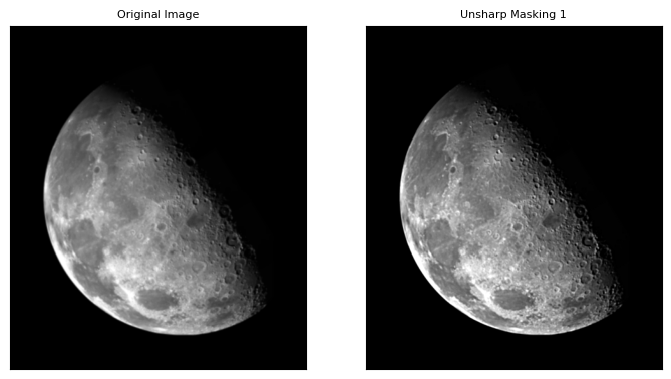

In [ ]:
plt.figure(figsize=(13, 10), num='test.img')

# original image
plt.subplot(131)
plt.title('Original Image', fontsize = 8)
plt.xticks([]), plt.yticks([])
plt.imshow(img, 'gray')

# Unsharp Masking 1
plt.subplot(132)
plt.title('Unsharp Masking 1', fontsize = 8)
plt.xticks([]), plt.yticks([])
plt.imshow(sharpned_img1, 'gray')

In [ ]:
# method 02
# Blur the image - GaussianBlur
guass2 = cv2.GaussianBlur(img, (13,13), 0)

# create the mask
mask = cv2.subtract(img, guass2)

# add mask and the original image
sharpned_image2 = cv2.add(img, cv2.multiply(mask, 0.95))

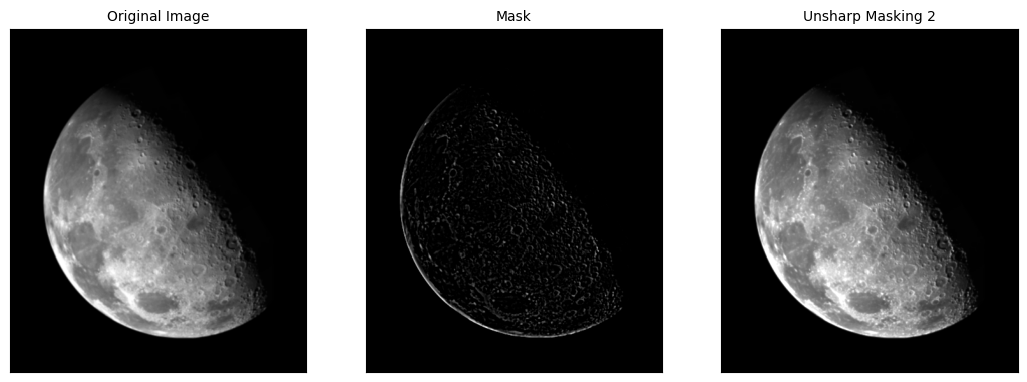

In [ ]:
# Plot

titles = ['Original Image', 'Mask', 'Unsharp Masking 2']
images = [img, mask, sharpned_image2]

plt.figure(figsize=(13, 10), num='test.img')

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(titles[i], fontsize = 10)
    plt.xticks([]), plt.yticks([])
    plt.imshow(images[i], 'gray')